## <U> Lead Scoring case study

#### <u>Problem statement
    
     Xeducation company wants to improve their lead score by identifying the customers who are most      likely to get converted.Although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
    
#### <u> Goal  
    Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
    

Importing all the necessary libraries as required

In [467]:
import warnings
warnings.filterwarnings("ignore")

In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

### Data reading and preprocessing

In [469]:
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [470]:
lead_data.shape

(9240, 37)

In [471]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Handling missing values

In [472]:
round(100*(lead_data.isnull().sum()/len(lead_data))).sort_values(ascending=False)

Lead Quality                                     52.0
Asymmetrique Profile Score                       46.0
Asymmetrique Activity Score                      46.0
Asymmetrique Profile Index                       46.0
Asymmetrique Activity Index                      46.0
Tags                                             36.0
What is your current occupation                  29.0
Lead Profile                                     29.0
What matters most to you in choosing a course    29.0
Country                                          27.0
How did you hear about X Education               24.0
Specialization                                   16.0
City                                             15.0
Last Activity                                     1.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Receive More Updates About Our Courses            0.0
I agree to pay the amount through cheque          0.0
Get updates on DM Content   

#### Dropping columns with more than 45% of missing values

In [473]:
lead_data = lead_data.drop(columns= ['Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
                                     'Asymmetrique Profile Index','Asymmetrique Activity Index','Tags'])

In [474]:
lead_data.shape

(9240, 31)

In [475]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [476]:
round(100*(lead_data.isnull().sum()/len(lead_data))).sort_values(ascending=False)

What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Lead Profile                                     29.0
Country                                          27.0
How did you hear about X Education               24.0
Specialization                                   16.0
City                                             15.0
Last Activity                                     1.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
X Education Forums                                0.0
Update me on Supply Chain Content                 0.0
Get updates on DM Content                         0.0
I agree to pay the amount through cheque          0.0
A free copy of Mastering The Interview            0.0
Receive More Updates About Our Courses            0.0
Through Recommendations                           0.0
Digital Advertisement                             0.0
Newspaper                   

Dropping Lead profile as it has "select" and Nan values contributing almost 74 % of the total data

In [477]:
lead_data["Lead Profile"].value_counts(dropna=False)/len(lead_data)

Lead Profile
Select                         0.448701
NaN                            0.293182
Potential Lead                 0.174567
Other Leads                    0.052706
Student of SomeSchool          0.026082
Lateral Student                0.002597
Dual Specialization Student    0.002165
Name: count, dtype: float64

In [478]:
lead_data = lead_data.drop("Lead Profile",axis=1)

Dropping "What matters most to you in choosing a course" column as it has Better Career Prospects as the value
for almost 70 percent of data. Hence it wont be important for our analysis.

In [479]:
lead_data["What matters most to you in choosing a course"].value_counts()/len(lead_data)


What matters most to you in choosing a course
Better Career Prospects      0.706494
Flexibility & Convenience    0.000216
Other                        0.000108
Name: count, dtype: float64

In [480]:
lead_data = lead_data.drop("What matters most to you in choosing a course",axis=1)

Dropping "What is your current occupation" as majority are unemployed and this wont add any additional insights
to our analysis.

In [481]:
lead_data["What is your current occupation"].value_counts()/len(lead_data)


What is your current occupation
Unemployed              0.606061
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: count, dtype: float64

In [482]:
lead_data = lead_data.drop("What is your current occupation",axis=1)

Dropping the column Country as India contributes 70 percent of data and rest of the countries are very less
in number.

In [483]:
lead_data["Country"].value_counts()/len(lead_data)

Country
India                   0.702597
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
China                   0.000216
Asia/Pacific Region     0.000216
Uganda                  0.000216
Bangladesh              0.000216
Italy                   0.000216
Belgium                 0.000216
Netherlands             0.000216
Ghana                   0.000216
Philippines             0.000216
Russia                  0.000108
Switzerland             0.000108
Vi

In [484]:
lead_data = lead_data.drop("Country",axis=1)

Dropping the below field as it has more than 77 percent of data having either select or null value

In [485]:
lead_data["How did you hear about X Education"].value_counts(dropna=False)/len(lead_data)

How did you hear about X Education
Select                   0.545779
NaN                      0.238853
Online Search            0.087446
Word Of Mouth            0.037662
Student of SomeSchool    0.033550
Other                    0.020130
Multiple Sources         0.016450
Advertisements           0.007576
Social Media             0.007251
Email                    0.002814
SMS                      0.002489
Name: count, dtype: float64

In [486]:
lead_data= lead_data.drop("How did you hear about X Education",axis=1)

In [487]:
round(100*(lead_data.isnull().sum()/len(lead_data))).sort_values(ascending=False)

Specialization                              16.0
City                                        15.0
TotalVisits                                  1.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Prospect ID                                  0.0
X Education Forums                           0.0
A free copy of Mastering The Interview       0.0
I agree to pay the amount through cheque     0.0
Get updates on DM Content                    0.0
Update me on Supply Chain Content            0.0
Receive More Updates About Our Courses       0.0
Through Recommendations                      0.0
Digital Advertisement                        0.0
Newspaper                                    0.0
Magazine                                     0.0
Newspaper Article                            0.0
Lead Number                                  0.0
Search                                       0.0
Total Time Spent on Website                  0.0
Converted           

Dropping the below columns as it least significant in our analysis

In [488]:
drop_cols=["Do Not Email","Do Not Call","Newspaper","Search","Magazine","X Education Forums",
         "Newspaper Article","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
         "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
         "A free copy of Mastering The Interview","City"]


lead_data = lead_data.drop(columns=drop_cols)

Replacing "Select" value of Specialization with "not provided" as this column is important,
It cannot be dropped.

In [489]:
lead_data["Specialization"].value_counts(dropna=False)
lead_data["Specialization"]= lead_data["Specialization"].replace("Select","Not provided")

Dropping the rows with null values for Specialization,TotalVisits,
Page Views Per Visit and Last Activity

In [490]:
lead_data = lead_data[~lead_data["Specialization"].isnull()]

In [491]:
lead_data = lead_data[~lead_data["TotalVisits"].isnull()]

In [492]:
lead_data = lead_data[~lead_data["Page Views Per Visit"].isnull()]

In [493]:
lead_data = lead_data[~lead_data["Last Activity"].isnull()]

In [494]:
round(100*(lead_data.isnull().sum()/len(lead_data))).sort_values(ascending=False)


Prospect ID                    0.0
Lead Number                    0.0
Lead Origin                    0.0
Lead Source                    0.0
Converted                      0.0
TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
Last Activity                  0.0
Specialization                 0.0
Last Notable Activity          0.0
dtype: float64

Prospect ID and Lead Number also doesnt make any insights to the analysis

In [495]:
lead_data = lead_data.drop(columns=["Prospect ID","Lead Number"])

In [496]:
round(100*(lead_data.isnull().sum()/len(lead_data))).sort_values(ascending=False)


Lead Origin                    0.0
Lead Source                    0.0
Converted                      0.0
TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
Last Activity                  0.0
Specialization                 0.0
Last Notable Activity          0.0
dtype: float64

### Data Visualization

Visulaizing numerical variables using pairplot

<Figure size 1000x500 with 0 Axes>

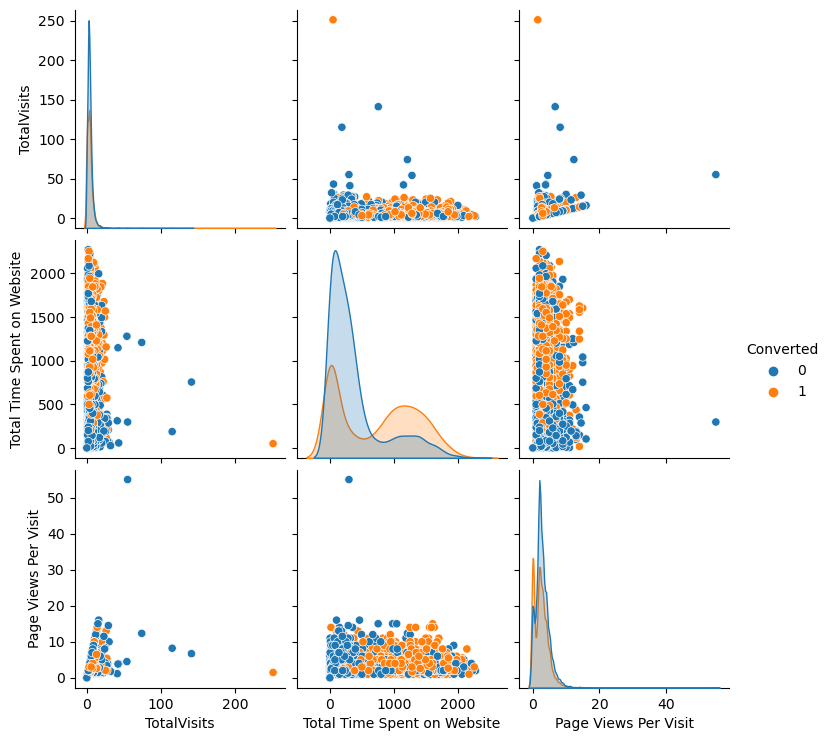

In [497]:
plt.figure(figsize=(10, 5))
sns.pairplot(data=lead_data,hue="Converted")
plt.show()

We can see that as the total time spent on the website increases, the conversion rate also increases.

Visualizing Categorical variables

In [498]:
car_list = lead_data.select_dtypes(include ='object').columns
car_list

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'Last Notable Activity'],
      dtype='object')

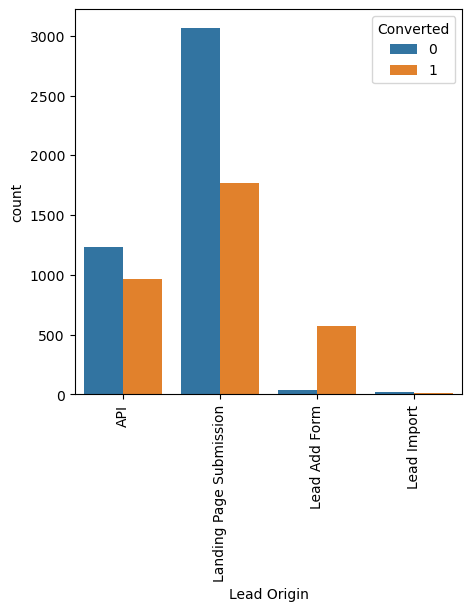

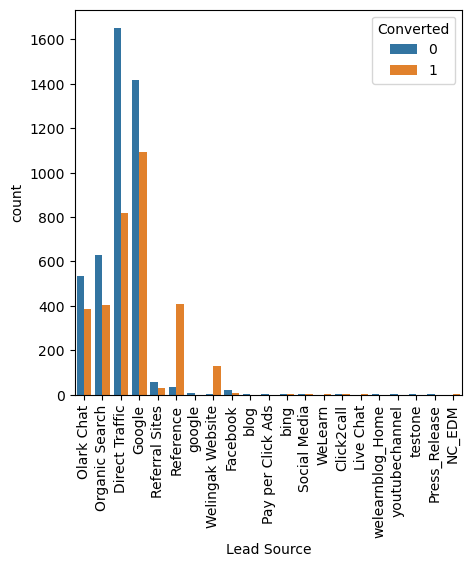

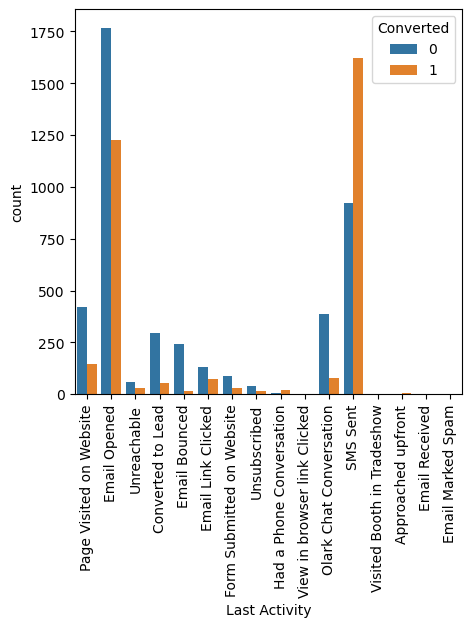

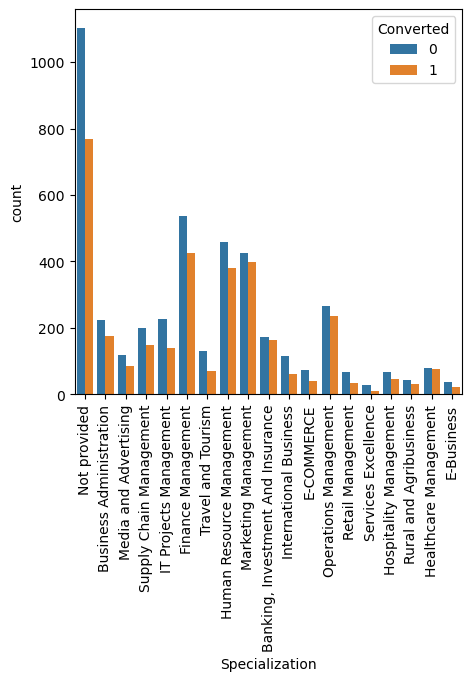

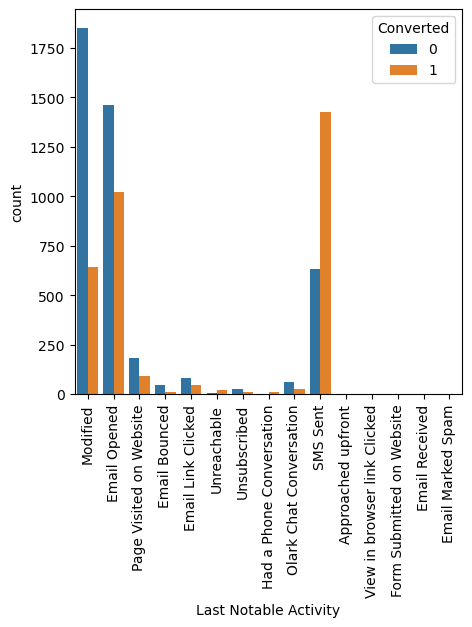

In [499]:
 for i in car_list:
    plt.figure(figsize=[5,5])  

    sns.countplot(x= lead_data[i],data=lead_data,hue="Converted")
    plt.xticks(rotation=90)
    plt.show()
        

Plotting heatmap to find the correlation

In [500]:

corr=lead_data.corr(numeric_only=True)

<Axes: >

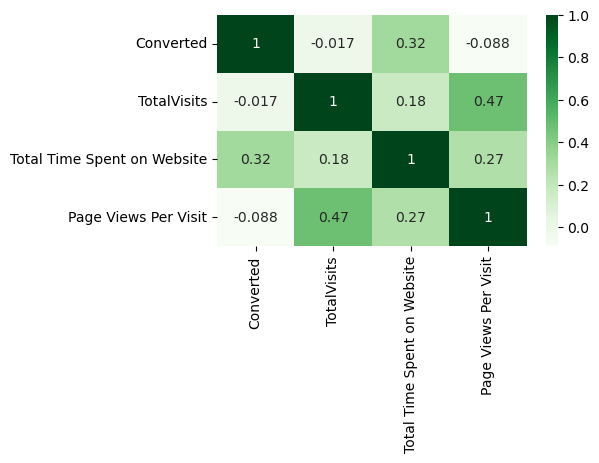

In [501]:
plt.figure(figsize=[5,3])
sns.heatmap(data=corr,annot=True,cmap='Greens')

## Creating dummy variables

In [502]:
lead_data = pd.get_dummies(lead_data,drop_first= True,dtype=int)

In [503]:
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Test Train split

In [504]:
X= lead_data.drop("Converted",axis=1)
y = lead_data["Converted"]

In [505]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [506]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [507]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=100)

In [508]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5370, 73)
(2302, 73)
(5370,)
(2302,)


## Standardization

Using MinMaxScaler

In [509]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [510]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3253,0.035461,0.144806,0.3125,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8513,0.028369,0.119278,0.2500,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0.028369,0.098151,0.1250,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1095,0.014184,0.237236,0.1250,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3568,0.007092,0.102553,0.0625,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

### feature selection using RFE

In [511]:
logreg = LogisticRegression()
rfe= RFE(logreg,n_features_to_select=15)
rfe= rfe.fit(X_train,y_train)

In [512]:
cols=X_train.columns[rfe.support_]
X_train_rfe = X_train[cols]
X_train_rfe.columns

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Not provided', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

#### Building model using statsmodel

In [513]:
X_train_sm= sm.add_constant(X_train_rfe)
lm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm1= lm1.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5370
Model:                            GLM   Df Residuals:                     5354
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2518.2
Date:                Mon, 14 Oct 2024   Deviance:                       5036.3
Time:                        13:46:27   Pearson chi2:                 5.54e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3494
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8890      0.167     -5.338      0.000      -1.215      -0.563
Total Time Spent on Website                       4.4431      0.165     26.858      0.000       4.119       4.767
Lead Origin_Landing Page Submission              -1.3090      0.128    -10.247      0.000      -1.559      -1.059
Lead Origin_Lead Add Form                         3.2788      0.239     13.722      0.000       2.810       3.747
Lead Source_Olark Chat                            1.1999      0.133      9.020      0.000       0.939       1.461
Lead Source_Welingak Website                      2.6469      1.034      2.561      0.010       0.621       4.673
Last Activity_Email Bounced                      -1.1768      0.353     -3.338      0.001      -1.868      -0.486
Last Activity_Email Opened                        1.2344      0.164      7.549      0.000       0.914       1.555
Last Activity_Email Received                     21.3326   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
Last Activity_Had a Phone Conversation            2.2895      0.613      3.733      0.000       1.087       3.492
Last Activity_SMS Sent                            1.2462      0.115     10.865      0.000       1.021       1.471
Specialization_Not provided                      -1.1650      0.128     -9.121      0.000      -1.415      -0.915
Last Notable Activity_Email Opened               -0.9834      0.185     -5.328      0.000      -1.345      -0.622
Last Notable Activity_Modified                   -1.0811      0.113     -9.584      0.000      -1.302      -0.860
Last Notable Activity_Olark Chat Conversation    -1.3189      0.433     -3.046      0.002      -2.167      -0.470
Last Notable Activity_Unreachable                 1.6577      0.595      2.784      0.005       0.491       2.825
=================================================================================================================
"""

#### checking the VIF

In [514]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Email Opened,9.03
6,Last Activity_Email Opened,8.56
1,Lead Origin_Landing Page Submission,4.27
9,Last Activity_SMS Sent,2.60
12,Last Notable Activity_Modified,2.32
10,Specialization_Not provided,2.12
0,Total Time Spent on Website,2.10
2,Lead Origin_Lead Add Form,1.66
3,Lead Source_Olark Chat,1.57
4,Lead Source_Welingak Website,1.32


 Dropping Last Notable Activity_Email Opened as it has hig VIF

In [515]:
X_train_rfe= X_train_rfe.drop("Last Notable Activity_Email Opened",axis=1)

#### Building the second model

In [516]:
X_train_sm= sm.add_constant(X_train_rfe)
lm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm1= lm1.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5370
Model:                            GLM   Df Residuals:                     5355
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2532.1
Date:                Mon, 14 Oct 2024   Deviance:                       5064.3
Time:                        13:46:28   Pearson chi2:                 5.55e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3460
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1408      0.161     -7.098      0.000      -1.456      -0.826
Total Time Spent on Website                       4.4595      0.165     27.012      0.000       4.136       4.783
Lead Origin_Landing Page Submission              -1.2965      0.127    -10.171      0.000      -1.546      -1.047
Lead Origin_Lead Add Form                         3.3133      0.239     13.854      0.000       2.845       3.782
Lead Source_Olark Chat                            1.2043      0.133      9.073      0.000       0.944       1.464
Lead Source_Welingak Website                      2.5899      1.034      2.506      0.012       0.564       4.616
Last Activity_Email Bounced                      -1.1722      0.350     -3.349      0.001      -1.858      -0.486
Last Activity_Email Opened                        0.5739      0.109      5.261      0.000       0.360       0.788
Last Activity_Email Received                     21.3879   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Last Activity_Had a Phone Conversation            2.3052      0.608      3.794      0.000       1.114       3.496
Last Activity_SMS Sent                            1.4136      0.111     12.775      0.000       1.197       1.630
Specialization_Not provided                      -1.1433      0.127     -8.981      0.000      -1.393      -0.894
Last Notable Activity_Modified                   -0.7273      0.091     -8.021      0.000      -0.905      -0.550
Last Notable Activity_Olark Chat Conversation    -1.0898      0.431     -2.530      0.011      -1.934      -0.245
Last Notable Activity_Unreachable                 1.8937      0.594      3.187      0.001       0.729       3.058
=================================================================================================================
"""

In [517]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.91
6,Last Activity_Email Opened,2.64
9,Last Activity_SMS Sent,2.52
0,Total Time Spent on Website,2.10
10,Specialization_Not provided,2.06
11,Last Notable Activity_Modified,1.68
2,Lead Origin_Lead Add Form,1.63
3,Lead Source_Olark Chat,1.55
4,Lead Source_Welingak Website,1.32
5,Last Activity_Email Bounced,1.14


We can see that eventhough all the variables have VIF less than 5 Last Activity_Email Received is having 
p value as .999 , so we can drop Last Activity_Email Received as well.

In [518]:
X_train_rfe= X_train_rfe.drop("Last Activity_Email Received",axis=1)

#### Building the 3rd model

In [519]:
X_train_sm = sm.add_constant(X_train_rfe)
lm3= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lm3= lm3.fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5370
Model:                            GLM   Df Residuals:                     5356
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.5
Date:                Mon, 14 Oct 2024   Deviance:                       5069.0
Time:                        13:46:28   Pearson chi2:                 5.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3454
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1332      0.161     -7.057      0.000      -1.448      -0.819
Total Time Spent on Website                       4.4628      0.165     27.036      0.000       4.139       4.786
Lead Origin_Landing Page Submission              -1.2932      0.127    -10.150      0.000      -1.543      -1.043
Lead Origin_Lead Add Form                         3.3152      0.239     13.864      0.000       2.847       3.784
Lead Source_Olark Chat                            1.2049      0.133      9.080      0.000       0.945       1.465
Lead Source_Welingak Website                      2.5896      1.033      2.506      0.012       0.564       4.615
Last Activity_Email Bounced                      -1.1821      0.350     -3.377      0.001      -1.868      -0.496
Last Activity_Email Opened                        0.5634      0.109      5.175      0.000       0.350       0.777
Last Activity_Had a Phone Conversation            2.2956      0.608      3.778      0.000       1.105       3.486
Last Activity_SMS Sent                            1.4031      0.110     12.707      0.000       1.187       1.619
Specialization_Not provided                      -1.1427      0.127     -8.979      0.000      -1.392      -0.893
Last Notable Activity_Modified                   -0.7293      0.091     -8.049      0.000      -0.907      -0.552
Last Notable Activity_Olark Chat Conversation    -1.0999      0.431     -2.553      0.011      -1.944      -0.256
Last Notable Activity_Unreachable                 1.8832      0.594      3.169      0.002       0.719       3.048
=================================================================================================================
"""

In [520]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.91
6,Last Activity_Email Opened,2.64
8,Last Activity_SMS Sent,2.51
0,Total Time Spent on Website,2.10
9,Specialization_Not provided,2.06
10,Last Notable Activity_Modified,1.68
2,Lead Origin_Lead Add Form,1.63
3,Lead Source_Olark Chat,1.55
4,Lead Source_Welingak Website,1.32
5,Last Activity_Email Bounced,1.14


lm3 seems to be a good model as it has all the variables with VIF less than 5 and p value less than .05
Hence We can make predictions using this model lm3.

In [521]:
y_train_pred= lm3.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.22849588, 0.20903509, 0.07127383, ..., 0.48183367, 0.18276665,
       0.37573949])

In [522]:
y_train_final =pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})

In [523]:
y_train_final.head()

,Converted,Converted_prob
0,0,0.228496
1,0,0.209035
2,0,0.071274
3,0,0.109383
4,0,0.013471


In [524]:
y_train_final["Predicted"] = y_train_final.Converted_prob.apply(lambda x: 1 if x> 0.5 else 0)
y_train_final.head()


,Converted,Converted_prob,Predicted
0,0,0.228496,0
1,0,0.209035,0
2,0,0.071274,0
3,0,0.109383,0
4,0,0.013471,0


#### Checking accuracy  & confusion matrix for threshold of 0.5

In [525]:
accuracy = metrics.accuracy_score(y_train_final.Converted,y_train_final.Predicted)
accuracy

0.786219739292365

Confusion matrix

In [526]:
confusion_matrix= metrics.confusion_matrix(y_train_final.Converted,y_train_final.Predicted)
confusion_matrix

array([[2595,  455],
       [ 693, 1627]], dtype=int64)

### Other metrics like Sensitivity,Specificity etc

 confusion matrix 
    [2595,  455],
    [ 693, 1627]
    

In [527]:
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
TP = confusion_matrix[1,1]


In [528]:
# sensitivity
sens = TP/float(TP+FN)
sens

0.7012931034482759

In [529]:
# specificity
spec = TN/float(TN+FP)
spec

0.8508196721311475

In [530]:
# FPR
FPR = FP/float(TN+FP)
FPR

0.14918032786885246

In [531]:
## Plotting ROC curve

In [532]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [533]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_final.Converted, y_train_final.Converted_prob, drop_intermediate = False )

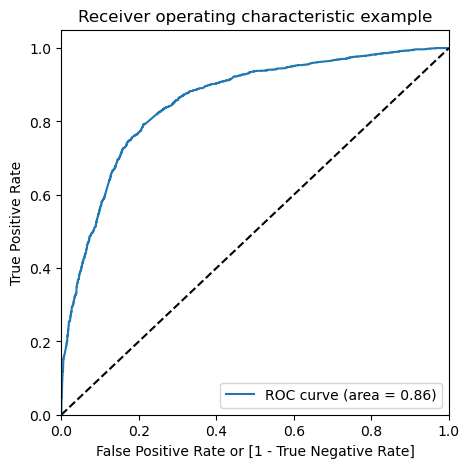

In [534]:
draw_roc(y_train_final.Converted, y_train_final.Converted_prob)

### Finding the optimal cut off

In [535]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i]= y_train_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.228496,0,1,1,1,0,0,0,0,0,0,0
1,0,0.209035,0,1,1,1,0,0,0,0,0,0,0
2,0,0.071274,0,1,0,0,0,0,0,0,0,0,0
3,0,0.109383,0,1,1,0,0,0,0,0,0,0,0
4,0,0.013471,0,1,0,0,0,0,0,0,0,0,0


In [536]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final.Converted, y_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.432030  1.000000  0.000000
0.1   0.1  0.549348  0.978448  0.222951
0.2   0.2  0.694786  0.934483  0.512459
0.3   0.3  0.761080  0.877586  0.672459
0.4   0.4  0.786592  0.773276  0.796721
0.5   0.5  0.786220  0.701293  0.850820
0.6   0.6  0.760521  0.587069  0.892459
0.7   0.7  0.737058  0.487500  0.926885
0.8   0.8  0.701676  0.365086  0.957705
0.9   0.9  0.648045  0.205172  0.984918


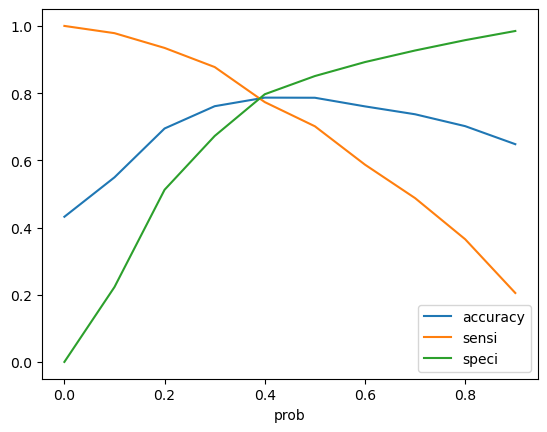

In [537]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve 0.4 seems to be a good threshold

In [538]:
y_train_final["Final_predicted"] = y_train_final.Converted_prob.map(lambda x:1 if x >0.4 else 0)
y_train_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.228496,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.209035,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.071274,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.109383,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.013471,0,1,0,0,0,0,0,0,0,0,0,0


Checking accuracy,confusion matrix and other metrics for 0.4 threshold value

In [539]:
accuarcy = metrics.accuracy_score(y_train_final.Converted,y_train_final.Final_predicted)
accuracy

0.6480446927374302

In [540]:
confusion_matrix = metrics.confusion_matrix(y_train_final.Converted,y_train_final.Final_predicted)
confusion_matrix

array([[2430,  620],
       [ 526, 1794]], dtype=int64)

In [541]:
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
TP = confusion_matrix[1,1]


In [542]:
# sensitivity
sens = TP/float(TP+FN)
sens

0.7732758620689655

In [543]:
#specificity
spec= TN/float(TN+FP)
spec

0.7967213114754098

In [544]:
# FPR
FPR = FP/float(TN+FP)
FPR

0.20327868852459016

## Precision and Recall

In [545]:
prec = metrics.precision_score(y_train_final.Converted,y_train_final.Final_predicted)
prec

0.7431648715824358

In [546]:
rec= metrics.recall_score(y_train_final.Converted,y_train_final.Final_predicted)
rec

0.7732758620689655

In [547]:
p, r, thresholds = precision_recall_curve(y_train_final.Converted,y_train_final.Converted_prob)

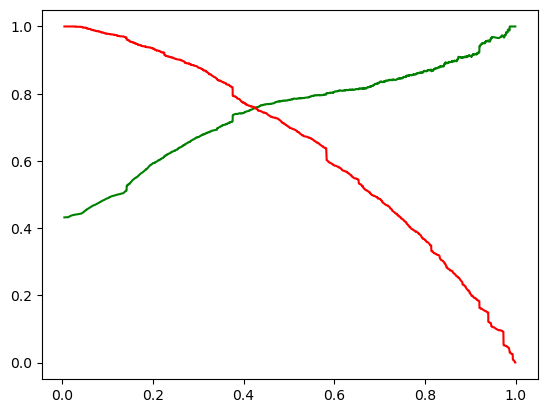

In [548]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on Test Data

In [549]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [550]:
X_test_rfe = X_test[X_train_rfe.columns]

In [551]:
X_test_rfe.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Not provided,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
6272,0.041373,1,0,0,0,0,1,0,0,0,0,0,0
6311,0.051496,0,0,0,0,0,0,0,0,0,1,0,0
8551,0.000000,0,0,1,0,0,1,0,0,1,0,0,0
87,0.042694,1,0,0,0,0,1,0,0,0,0,0,0
407,0.590229,0,0,0,0,0,1,0,0,1,0,0,0


In [552]:
y_test.head()

6272    1
6311    0
8551    1
87      0
407     1
Name: Converted, dtype: int64

In [553]:
X_test_sm = sm.add_constant(X_test_rfe)

In [554]:
y_test_pred = lm3.predict(X_test_sm)

In [555]:
y_test_pred.head()

6272    0.157304
6311    0.163452
8551    0.375739
87      0.158087
407     0.715348
dtype: float64

In [556]:
y_test_df= pd.DataFrame(y_test)

In [557]:
y_test_pred_df = pd.DataFrame(y_test_pred)

In [558]:
# Removing index for both dataframes to append them side by side 
y_test_df.reset_index(drop=True,inplace=True)
y_test_pred_df.reset_index(drop=True,inplace=True)

In [559]:
y_test_final = pd.concat([y_test_df,y_test_pred_df],axis=1)

In [560]:

y_test_final=y_test_final.rename(columns={0:"Converted_prob"})

In [561]:
y_test_final.head()

,Converted,Converted_prob
0,1,0.157304
1,0,0.163452
2,1,0.375739
3,0,0.158087
4,1,0.715348


In [562]:
y_test_final["Predicted"] =y_test_final.Converted_prob.map(lambda x:1 if x>0.4 else 0)
y_test_final.head()

,Converted,Converted_prob,Predicted
0,1,0.157304,0
1,0,0.163452,0
2,1,0.375739,0
3,0,0.158087,0
4,1,0.715348,1


In [564]:
accuracy_test = metrics.accuracy_score(y_test_final.Converted,y_test_final.Predicted)
accuracy_test


0.7841007819287577

In [565]:
confusion_test = metrics.confusion_matrix(y_test_final.Converted,y_test_final.Predicted)
confusion_test

array([[1040,  272],
       [ 225,  765]], dtype=int64)

In [566]:
TP= confusion_test[1,1]
TN= confusion_test[0,0]
FP= confusion_test[0,1]
FN= confusion_test[1,0]

In [568]:
sen = TP/float(TP+FN)
sen

0.7727272727272727

In [569]:
spec= TN/float(TN+FP)
spec

0.7926829268292683

In [572]:
prec= metrics.precision_score(y_test_final.Converted,y_test_final.Predicted)
prec

0.7377049180327869

In [574]:
recall= metrics.recall_score(y_test_final.Converted,y_test_final.Predicted)
recall

0.7727272727272727